# Basic Recommendation System - BookCrossing

Python implementation of a basic recommendation system.

Data used: BookCrossing data from http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('RdBu')

%matplotlib inline

### User Data

In [2]:
# Read in the data
users = pd.read_csv('data/BookCrossing/BX-Users.csv', sep=';', dtype='object', encoding='latin-1')
users.columns = ['user_id', 'location', 'age']
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",NaN


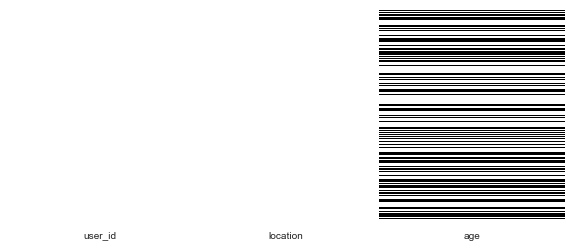

In [3]:
# First, check for missing values
# Any black line will indicate missing values
plt.figure(figsize=(10, 4))
sns.heatmap(users.isnull(), yticklabels=False, cbar=False, cmap='Greys')

In [4]:
# Since the age column has too many missing values, I will drop the column entirely.
users.drop('age', axis=1, inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 2 columns):
user_id     278858 non-null object
location    278858 non-null object
dtypes: object(2)
memory usage: 4.3+ MB


### Books Data

In [5]:
# The original data has columns with URLs, but they seem to cause errors when importing.
# I omitted those columns because I won't be using URLs for the analysis.
books = pd.read_csv('data/BookCrossing/BX-Books.csv', sep=';', dtype='object', 
                    usecols=['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'],
                    encoding='latin-1', )
books.columns = ['ISBN', 'title', 'author', 'publication_year', 'publisher']
books.dropna(inplace=True)
books.head()

,ISBN,title,author,publication_year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271377 entries, 0 to 271378
Data columns (total 5 columns):
ISBN                271377 non-null object
title               271377 non-null object
author              271377 non-null object
publication_year    271377 non-null object
publisher           271377 non-null object
dtypes: object(5)
memory usage: 12.4+ MB


### Ratings Data

In [7]:
# Read in the ratings data.
ratings = pd.read_csv('data/BookCrossing/BX-Book-Ratings.csv', sep=';', dtype='object', 
                      encoding='latin-1', header=0)
ratings.columns = ['user_id', 'ISBN', 'rating']
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
user_id    1149780 non-null object
ISBN       1149780 non-null object
rating     1149780 non-null object
dtypes: object(3)
memory usage: 26.3+ MB


In [9]:
# JOIN books and ratings tables on the ISBN
books = pd.merge(books, ratings, on='ISBN')
books.head()

,ISBN,title,author,publication_year,publisher,user_id,rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031173 entries, 0 to 1031172
Data columns (total 7 columns):
ISBN                1031173 non-null object
title               1031173 non-null object
author              1031173 non-null object
publication_year    1031173 non-null object
publisher           1031173 non-null object
user_id             1031173 non-null object
rating              1031173 non-null object
dtypes: object(7)
memory usage: 62.9+ MB


In [12]:
n_users = books.user_id.nunique()
n_items = books.title.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Books: '+str(n_items))

Num. of Users: 92107
Num of Books: 241089


In [14]:
# JOIN the books and users table on user_id
books = pd.merge(books, users, on='user_id')
books.head()

,ISBN,title,author,publication_year,publisher,user_id,rating,location
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa"
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada"
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada"
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada"
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada"


In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031173 entries, 0 to 1031172
Data columns (total 8 columns):
ISBN                1031173 non-null object
title               1031173 non-null object
author              1031173 non-null object
publication_year    1031173 non-null object
publisher           1031173 non-null object
user_id             1031173 non-null object
rating              1031173 non-null object
location            1031173 non-null object
dtypes: object(8)
memory usage: 70.8+ MB


In [19]:
# Convert rating to integer
books['rating'] = books['rating'].astype('int')

In [20]:
# Show the top 10 best rated books
books.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Equal Rites (Discworld Novels (Audio))                                        10.0
Great Quotes from Great Women                                                 10.0
Found Wanting                                                                 10.0
Matthew Henry's Commentary                                                    10.0
Christmas Sing-Along (Pop Up Book)                                            10.0
Matthew Arnold: a collection of critical essays, (Twentieth century views)    10.0
Found: One Husband (Harlequin Medical Romance)                                10.0
At the Japanese Table: New and Traditional Recipes                            10.0
Matthew Arnold: A Literary Life (Literary Lives Series)                       10.0
Renoir (Miniature art masters)                                                10.0
Name: rating, dtype: float64

The above result may be misleading, because some books may have received very high ratings by only a few users. To verify this, we may need to check the distribution of ratings. Before we do this, let's check out the top 10 most frequently rated books.

In [22]:
# Show the top 10 most frequently rated books
books.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: rating, dtype: int64

In [23]:
# Now, create a data frame that includes both info from above
ratings = pd.DataFrame(books.groupby('title')['rating'].mean())
ratings['rating_freq'] = pd.DataFrame(books.groupby('title')['rating'].count())

# Check the first 5 rows
ratings.head()

,rating,rating_freq
title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25,4
Always Have Popsicles,0.00,1
Apple Magic (The Collector's series),0.00,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00,1


In [37]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241089 entries,  A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America) to Ã?Â?thique en toc
Data columns (total 2 columns):
rating         241089 non-null float64
rating_freq    241089 non-null int64
dtypes: float64(1), int64(1)
memory usage: 15.5+ MB


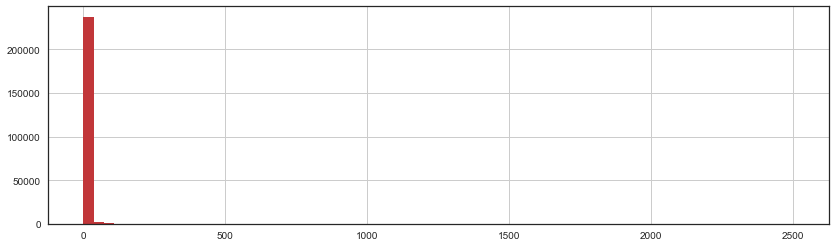

In [108]:
# Distribution of the number of ratings
ratings['rating_freq'].hist(bins=70, figsize=(14,4))

As suspected, it appears that the vast majority of books have only very few ratings.

In [61]:
print('Percentage of books that has only 1 rating:',
      round(len(ratings[ratings['rating_freq'] == 1]) / len(ratings) * 100, 2), '%')
print('Percentage of books that has only 2 rating:',
      round(len(ratings[ratings['rating_freq'] == 2]) / len(ratings) * 100, 2), '%')

Percentage of books that has only 1 rating: 52.89 %
Percentage of books that has only 2 rating: 17.73 %


70% of total books have just one or two ratings. 

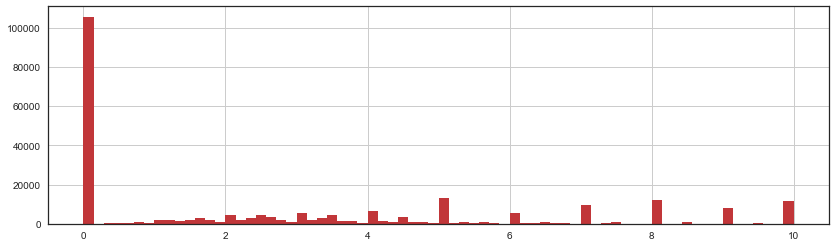

In [107]:
# Distribution of the ratings
ratings['rating'].hist(bins=70, figsize=(14,4))

The distribution of the ratings is potentially problematic as well, because it appears that the books with a rating of 0 take up the vast majority of the data.

In [62]:
print('Percentage of books that have a rating of 0:',
      round(len(ratings[ratings['rating'] == 0]) / len(ratings) * 100, 2), '%')

Percentage of books that have a rating of 0: 43.77 %


Because the data seems severely skewed, I am going to create a new data frame that contains only the books that have more than 100 ratings, and at the same time have a mean rating greater than 0.

In [67]:
filtered_books = ratings[(ratings['rating'] != 0) & (ratings['rating_freq'] > 100)]

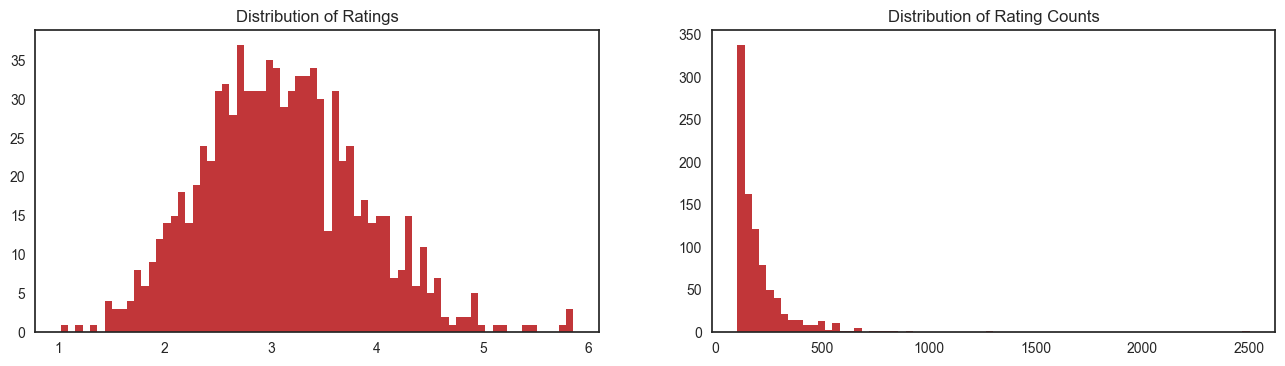

In [104]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4), dpi=100)

# Distribution of the ratings
hist_ratings = axes[0].hist(filtered_books['rating'],bins=70)
axes[0].set_title('Distribution of Ratings')

# Distribution of the number of ratings
hist_ratingsfreq = axes[1].hist(filtered_books['rating_freq'], bins=70)
axes[1].set_title('Distribution of Rating Counts')

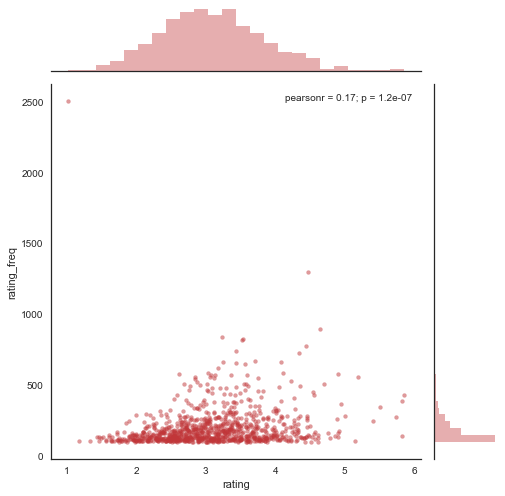

In [105]:
# Relationship between rating value vs rating frequeny
sns.jointplot(x='rating', y='rating_freq', data=filtered_books, alpha=0.5, size=7, joint_kws={'s':15})

In [111]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031173 entries, 0 to 1031172
Data columns (total 8 columns):
ISBN                1031173 non-null object
title               1031173 non-null object
author              1031173 non-null object
publication_year    1031173 non-null object
publisher           1031173 non-null object
user_id             1031173 non-null object
rating              1031173 non-null int32
location            1031173 non-null object
dtypes: int32(1), object(7)
memory usage: 106.9+ MB


In [119]:
# Pivot the dataset into a matrix
books.ISBN.nunique()
for column in books.columns:
    print(column, books[column].nunique())

ISBN 270168
title 241089
author 101607
publication_year 137
publisher 16746
user_id 92107
rating 11
location 22480
